In [1]:
import re
import math
import numpy as np
from numpy import linalg
import pandas as pd
import time
from datetime import datetime
from dateutil.parser import parse
# sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# keras
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf
# nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download()
# spacy
import spacy
# Plot
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(9)

Using TensorFlow backend.


# 1. Data Preprocessing

In [2]:
entertainment = pd.read_json(r"./data/entertainment.txt")
politics = pd.read_json(r"./data/politics.txt")
us = pd.read_json(r"./data/us.txt")
world = pd.read_json(r"./data/world.txt")

In [3]:
display(entertainment, politics, us, world)

,Title,Content,Date,Category
0,Jamie Lee Curtis reveals Kirk Douglas once sav...,"Jamie Lee Curtis, says she has ,Kirk Douglas, ...","2020,2,8",entertainment
1,Shannen Doherty under 'enormous emotional dist...,"Shannen Doherty, is opening up about the inten...","2020,2,8",entertainment
2,"Meghan Markle, Prince Harry attend exclusive e...","Meghan Markle, and ,Prince Harry,'s mission to...","2020,2,7",entertainment
3,Country music star Jon Pardi on his hard work ...,"Jon Pardi, is the quintessential ,country, mus...","2020,2,4",entertainment
4,Ellen DeGeneres delivers powerful Golden Globe...,"Ellen DeGeneres, had the crowd in tears during...","2020,1,5",entertainment
...,...,...,...,...
3665,Russell Crowe misses Golden Globe Awards due t...,"Russell Crowe, was a winner at the ,77th Golde...","2020,1,5",entertainment
3666,Alex Rodriguez says Jennifer Lopez had a 'pole...,"When it came to her ,pole-dancing scenes in th...","2020,1,5",entertainment
3667,Jason Momoa ditches suit for tank top at Golde...,"Jason Momoa,'s Golden Globes' outfit has set t...","2020,1,5",entertainment
3668,Harvey Weinstein vows he'll be 'fully exonerat...,"Harvey Weinstein’s, criminal trial ,in New Yor...","2020,1,5",entertainment


,Title,Content,Date,Category
0,Bernie Sanders interrupted by topless proteste...,"A group of topless protesters stormed a ,Berni...","2020,2,16",politics
1,Dems weighing more investigations after Trump’...,"House Democrats, facing an election in nine mo...","2020,2,16",politics
2,Klobuchar wants Barr to testify before Senate ...,"Sen. ,Amy Klobuchar,, D-Minn., wants Attorney ...","2020,2,16",politics
3,Elizabeth Warren under fire for saying she acc...,"Sen. ,Elizabeth Warren,, D-Mass., is facing ba...","2020,2,12",politics
4,Colorado House panel kills bill that would man...,"Colorado, legislators have rejected a bill tha...","2020,2,12",politics
...,...,...,...,...
956,Nevada's powerful Culinary Union says members ...,The politically influential Culinary Union in ...,"2020,2,12",politics
957,Ex-Treasury employee pleads guilty to leaking ...,A former top Treasury Department official plea...,"2020,1,13",politics
958,"Trump denies interfering in Roger Stone case, ...","President Trump, on Wednesday denied interferi...","2020,2,12",politics
959,Trump administration ordered to restore immigr...,"A ,federal court, in ,Los Angeles, ordered the...","2020,2,12",politics


,Title,Content,Date,Category
0,Anti-fascist protest in Oregon leads to 3 arre...,Three people were arrested Saturday after a de...,"2020,2,9",us
1,"Endangered gray wolf that wandered 8,712 miles...","An ,endangered, gray wolf that wandered almost...","2020,2,8",us
2,Man carrying knife arrested outside White Hous...,A man carrying a knife was arrested outside th...,"2020,2,9",us
3,Missing California couple found dead in forest...,The San Bernardino County Sheriff’s Department...,"2020,2,5",us
4,Probe into Michigan State’s handling of Larry ...,"Michigan’s, Attorney General on Tuesday suspen...","2019,12,24",us
...,...,...,...,...
2397,South Carolina Democrat apologizes for ‘white ...,"A ,South Carolina, state lawmaker has issued a...","2019,12,25",us
2398,California dad dies after trying to rescue dau...,"A ,California, man died at a local hospital on...","2019,12,25",us
2399,"New York City man, 60, beaten by muggers over ...",Surveillance video shows a group of muggers pu...,"2019,12,25",us
2400,State Department stops sending explosive-detec...,The U.S. will temporarily halt its practice of...,"2019,12,24",us


,Title,Content,Date,Category
0,White House confirms Al Qaeda leader in Yemen ...,"The White House, on Thursday confirmed the dea...","2020,2,6",world
1,Israel's Netanyahu backtracks from immediate W...,"Israeli Prime Minister ,Benjamin Netanyahu, re...","2020,2,4",world
2,Notre-Dame: What to know about efforts to save...,One of the world's most renowned Catholic cath...,"2020,2,9",world
3,Australia wildfire overruns firefighters in mi...,"The terrifying speed at which a ,bushfire, can...","2020,1,30",world
4,Venezuela's ex-spy chief disappears on eve of ...,"Venezuela's, former spy chief has disappeared ...","2019,11,14",world
...,...,...,...,...
2582,Hong Kong official assaulted in 'barbaric atta...,"A ,Hong Kong, official was injured in an alleg...","2019,11,15",world
2583,Israeli airstrikes flatten Gaza terrorist grou...,"Israel’s, military announced Friday that it ha...","2019,11,15",world
2584,"The week in pictures, Nov. 9 - Nov. 15",,,world
2585,UK gym brawl caught on video; exercise equipme...,,"2019,11,14",world


In [4]:
# Concatenate into one dataset
news = pd.concat([entertainment, politics, us, world], ignore_index=True)
display(news.head(), news.tail())
display(news.groupby("Category").count())

,Title,Content,Date,Category
0,Jamie Lee Curtis reveals Kirk Douglas once sav...,"Jamie Lee Curtis, says she has ,Kirk Douglas, ...","2020,2,8",entertainment
1,Shannen Doherty under 'enormous emotional dist...,"Shannen Doherty, is opening up about the inten...","2020,2,8",entertainment
2,"Meghan Markle, Prince Harry attend exclusive e...","Meghan Markle, and ,Prince Harry,'s mission to...","2020,2,7",entertainment
3,Country music star Jon Pardi on his hard work ...,"Jon Pardi, is the quintessential ,country, mus...","2020,2,4",entertainment
4,Ellen DeGeneres delivers powerful Golden Globe...,"Ellen DeGeneres, had the crowd in tears during...","2020,1,5",entertainment


,Title,Content,Date,Category
9615,Hong Kong official assaulted in 'barbaric atta...,"A ,Hong Kong, official was injured in an alleg...","2019,11,15",world
9616,Israeli airstrikes flatten Gaza terrorist grou...,"Israel’s, military announced Friday that it ha...","2019,11,15",world
9617,"The week in pictures, Nov. 9 - Nov. 15",,,world
9618,UK gym brawl caught on video; exercise equipme...,,"2019,11,14",world
9619,Two more rockets fired from Gaza hours after '...,"Rockets, continue to be launched from Gaza int...","2019,11,14",world


,Title,Content,Date
Category,,,
entertainment,3670,3670,3670
politics,961,961,961
us,2402,2402,2402
world,2587,2587,2587


Handling the date values: 

In [5]:
# Handle the noisy data of date, if is nan, it will be replaced by the above value of the date
# Handle the data like: 2020,1,5,8 Jan,8 Jan,7 Jan,7 Jan,7 Jan,7 Jan,6 Jan,6 Jan,6 Jan,6 Jan
news["Date"].replace(r"^\s*$", "0", regex=True, inplace=True)
pattern = r"(\d{4}),(\d{1,2}),(\d{1,2})"
date_temp = []
for i in news["Date"]:
    if i=="0":
        date_temp.append("0")
    else:
        try:
            j = re.match(pattern,i)
            date_temp.append(j.group())
        except BaseException as e:
            date_temp.append("0")

In [6]:
news["Date"] = pd.DataFrame(date_temp)
j = 0
for i in news["Date"]:
    if i == "0":
        news["Date"][j] = news["Date"][j+1]
    else:
        pass
    j += 1

In [7]:
# news["Date"].isnull().any()
news[news["Date"].isnull()].index.tolist()

[]

In [8]:
# Drop the NULL values in the dataset
# In category of us, There are some "Also on this day:" in content, replace thses values with Nan.
news.replace(r"Also on this day:", np.nan, regex=True, inplace=True)
# replace white space with nan
news.replace(r"^\s*$", np.nan, regex=True, inplace=True)
# Drop the null values
news.dropna(inplace=True)
# Shuffle the data, and reset index
news = news.sample(frac=1)
news.reset_index(inplace=True)
news.drop(["index"], axis=1, inplace=True)
# remove the \xa0 in the dataset
news = news.replace("\xa0", "")

# Handling the Date Features

In [9]:
from dateutil.parser import parse

In [10]:
news["Date"] = pd.DataFrame([i.replace(",","-") for i in news["Date"]])
display(news["Date"])

0       2019-11-10
1        2020-1-15
2       2019-12-10
3         2020-2-2
4        2020-1-18
           ...    
9496     2019-6-30
9497      2020-2-3
9498      2020-1-2
9499     2020-1-20
9500     2019-7-22
Name: Date, Length: 9501, dtype: object

In [11]:
# news["Date"].apply(parse) --> some values may have zero
temp = []
for i in news["Date"]:
    try:
        temp.append(parse(i))
    except:
        pass
news["Date"] = pd.DataFrame(temp)

In [12]:
news["Date"]

0      2019-11-10
1      2020-01-15
2      2019-12-10
3      2020-02-02
4      2020-01-18
          ...    
9496          NaT
9497          NaT
9498          NaT
9499          NaT
9500          NaT
Name: Date, Length: 9501, dtype: datetime64[ns]

In [13]:
news[news["Date"].isnull()].index.tolist()

[9496, 9497, 9498, 9499, 9500]

In [14]:
news["Date"].iloc[9496] = "2019-6-30"
news["Date"].iloc[9496] = parse(news["Date"].iloc[9496])
# news["Date"].iloc[9496]
news["Date"].iloc[9497] = "2020-2-3"
news["Date"].iloc[9497] = parse(news["Date"].iloc[9497])

news["Date"].iloc[9498] = "2020-1-2"
news["Date"].iloc[9498] = parse(news["Date"].iloc[9498])

news["Date"].iloc[9499] = "2020-1-20"
news["Date"].iloc[9499] = parse(news["Date"].iloc[9499])

news["Date"].iloc[9500] = "2019-7-22"
news["Date"].iloc[9500] = parse(news["Date"].iloc[9500])

/home/weijun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
display(news.head(), news.tail())

,Title,Content,Date,Category
0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us
1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us
2,Kevin Hart reflects on 2019: 'My appreciation ...,"Kevin Hart, is reflecting on what has been a w...",2019-12-10 00:00:00,entertainment
3,Jennifer Lopez shares sweet message to Shakira...,"Jennifer Lopez, is spreading the love.,Ahead o...",2020-02-02 00:00:00,entertainment
4,Maher rips Warren for playing 'woman card' aga...,"""Real Time"" host ,Bill Maher, on Friday night ...",2020-01-18 00:00:00,entertainment


,Title,Content,Date,Category
9496,What was the worst hurricane to hit the US? He...,"Between early June and late November, coastal ...",2019-06-30 00:00:00,us
9497,"Brad Pitt jabs Meghan Markle, Prince Harry and...","Brad Pitt, poked fun at both “,Brexit,” and “M...",2020-02-03 00:00:00,entertainment
9498,"Oklahoma man allegedly stole truck, drove 130 ...","Oklahoma, police arrested a man on Wednesday a...",2020-01-02 00:00:00,us
9499,Mixed results as Sanders tries to get past cla...,It’s been nearly a week since the primetime du...,2020-01-20 00:00:00,politics
9500,South Korea says it fired 360 warning rounds a...,"South Korean, air force jets fired 360 rounds ...",2019-07-22 00:00:00,world


Filter and group by the category column:

In [16]:
# us = news[news["Category"] == "us"].reset_index()
# entertainment = news[news["Category"] == "entertainment"].reset_index()
# politics = news[news["Category"] == "politics"].reset_index()
# world = news[news["Category"] == "world"].reset_index()

In [17]:
# display(us.head(), entertainment.head(), politics.head(), world.head())

Remove the stopwords

In [18]:
# Solve the problem: Attempted to load corpora/stopwords.zip/stopwords/
# nltk.download()

Remove the stop worlds: 

In [19]:
data = news.copy()
stop = stopwords.words('english')
data['Content'] = data['Content'].str.lower().str.split()
data['Content'] = data['Content'].apply(lambda x: ' '.join([word for word in x if word not in stop]))
data['Content'] = pd.DataFrame(data['Content'])

data['Title'] = data['Title'].str.lower().str.split()
data['Title'] = data['Title'].apply(lambda x: ' '.join([word for word in x if word not in stop]))
data['Title'] = pd.DataFrame(data['Title'])
data

,Title,Content,Date,Category
0,alabama deputies help veteran disability tryin...,"deputies, ,alabama, pitched last week help ,ve...",2019-11-10 00:00:00,us
1,"father missing family confesses killing wife, ...","father missing ,connecticut, family confessed ...",2020-01-15 00:00:00,us
2,kevin hart reflects 2019: 'my appreciation lif...,"kevin hart, reflecting whirlwind 2019 beloved ...",2019-12-10 00:00:00,entertainment
3,jennifer lopez shares sweet message shakira ah...,"jennifer lopez, spreading love.,ahead halftime...",2020-02-02 00:00:00,entertainment
4,maher rips warren playing 'woman card' sanders...,"""real time"" host ,bill maher, friday night acc...",2020-01-18 00:00:00,entertainment
...,...,...,...,...
9496,worst hurricane hit us? costliest storms,"early june late november, coastal locations ,t...",2019-06-30 00:00:00,us
9497,"brad pitt jabs meghan markle, prince harry 'br...","brad pitt, poked fun “,brexit,” “megxit” ,marg...",2020-02-03 00:00:00,entertainment
9498,"oklahoma man allegedly stole truck, drove 130 ...","oklahoma, police arrested man wednesday allege...",2020-01-02 00:00:00,us
9499,mixed results sanders tries get past clash war...,it’s nearly week since primetime dust-up progr...,2020-01-20 00:00:00,politics


In [20]:
us = news[news["Category"] == "us"].reset_index()
entertainment = news[news["Category"] == "entertainment"].reset_index()
politics = news[news["Category"] == "politics"].reset_index()
world = news[news["Category"] == "world"].reset_index()

display(us.head(), entertainment.head(), politics.head(), world.head())

,index,Title,Content,Date,Category
0,0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us
1,1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us
2,6,Doctor killed in plane crash while preparing f...,"A ,plane crash, ahead of a ,Florida, air show ...",2019-11-03 00:00:00,us
3,8,Louisiana couple dead in Puerto Rico after cat...,"A ,Louisiana, couple died in Puerto Rico on We...",2020-01-02 00:00:00,us
4,9,Jeffrey Epstein prison guard's lawyer 'highly ...,A lawyer for one of the two guards on duty whe...,2020-01-30 00:00:00,us


,index,Title,Content,Date,Category
0,2,Kevin Hart reflects on 2019: 'My appreciation ...,"Kevin Hart, is reflecting on what has been a w...",2019-12-10 00:00:00,entertainment
1,3,Jennifer Lopez shares sweet message to Shakira...,"Jennifer Lopez, is spreading the love.,Ahead o...",2020-02-02 00:00:00,entertainment
2,4,Maher rips Warren for playing 'woman card' aga...,"""Real Time"" host ,Bill Maher, on Friday night ...",2020-01-18 00:00:00,entertainment
3,12,Jeff Goldblum says Woody Allen deserves due pr...,"Actor ,Jeff Goldblum, defended ,Woody Allen, d...",2019-11-07 00:00:00,entertainment
4,13,‘Dukes of Hazzard’ star John Schneider: New ‘C...,"John Schneider, might just be the world's bigg...",2019-10-29 00:00:00,entertainment


,index,Title,Content,Date,Category
0,18,Murkowski comes out against impeachment witnes...,Republican Sen. Lisa Murkowski came out Friday...,2020-01-31 00:00:00,politics
1,25,Andrew Yang drops out of Democratic presidenti...,"Tech entrepreneur ,Andrew Yang, on Tuesday end...",2020-02-11 00:00:00,politics
2,29,Tim Kaine's War Powers Resolution has the vote...,Democratic lawmakers said Tuesday that they ha...,2020-01-14 00:00:00,politics
3,35,"Amid Senate impeachment trial, Trump posts rec...","President Trump, is all about records.,He’s co...",2020-01-22 00:00:00,politics
4,45,"Iowa mess has Perez facing Dem Party storm, re...",Democratic National Committee Chairman Tom Per...,2020-02-07 00:00:00,politics


,index,Title,Content,Date,Category
0,5,Mugabe family at odds with Zimbabwe government...,"The family of ,Zimbabwe's, former strongman Ro...",2019-09-12 00:00:00,world
1,7,Five cities or villages outside United States ...,It seems the United States is not the only cou...,2020-02-05 00:00:00,world
2,10,New Zealand could ban some criminals from bein...,"WELLINGTON, New Zealand (AP) -- ,New Zealand,'...",2019-11-11 00:00:00,world
3,15,Australian police find $210M worth of meth hid...,"Police in ,Australia, have arrested four men i...",2019-10-31 00:00:00,world
4,16,ISIS encouraging followers to set wildfires in...,"The ,Islamic State, ,terror group, may have re...",2019-11-07 00:00:00,world


In [21]:
# find the null values' index of the Date columns
indices = list(np.where(data['Date'].isna()[0]))
indices

[array([], dtype=int64)]

## Tag Cloud

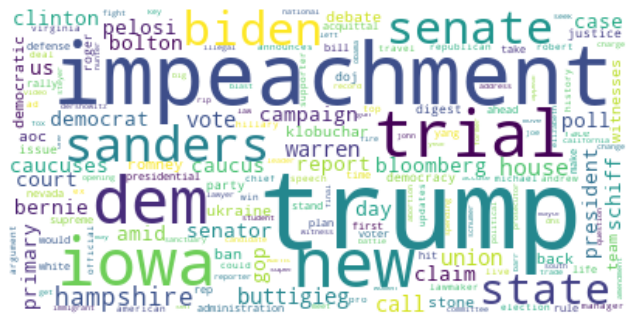

In [22]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

tx1 = politics["Title"].str.cat(sep=',').lower()
stop_list = ["say", "says"]
wordcloud = WordCloud(background_color="white",
                      collocations=False, # avoid repetition
                      stopwords=stop+stop_list).generate(tx1)

# Set the size of the figure
plt.figure(num = 1, figsize=(10, 8),dpi=80, frameon=False, clear=True)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

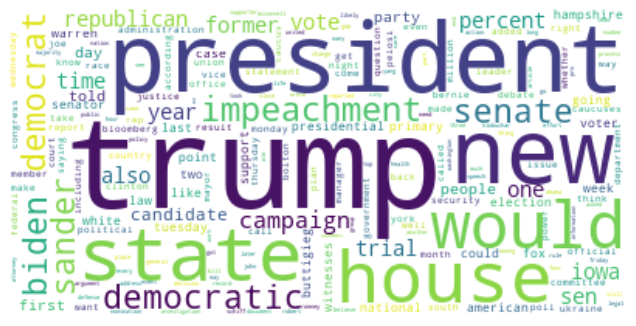

In [23]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

tx1 = politics["Content"].str.cat(sep=',').lower()
stop_list = ["say", "says","said"]
wordcloud = WordCloud(background_color="white",
                      collocations=False, # avoid repetition
                      stopwords=stop+stop_list).generate(tx1)

# Set the size of the figure
plt.figure(num = 1, figsize=(10, 8),dpi=80, frameon=False, clear=True)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

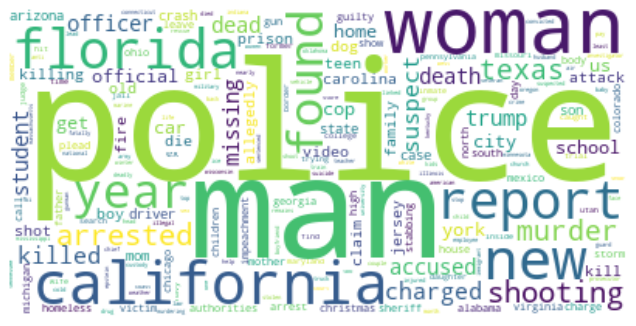

In [24]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

tx1 = us["Title"].str.cat(sep=',').lower()
stop_list = ["say", "says","said"]
wordcloud = WordCloud(background_color="white",
                      collocations=False, # avoid repetition
                      stopwords=stop+stop_list).generate(tx1)

# Set the size of the figure
plt.figure(num = 1, figsize=(10, 8),dpi=80, frameon=False, clear=True)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

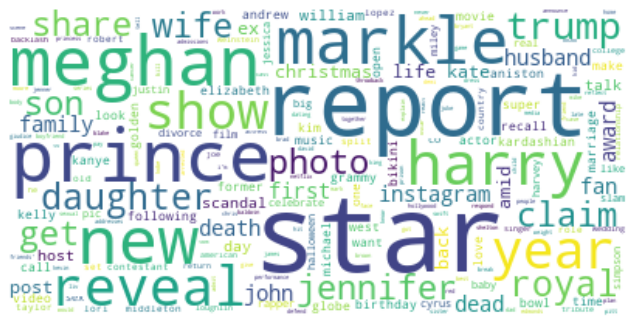

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

tx1 = entertainment["Title"].str.cat(sep=',').lower()
stop_list = ["say", "says","said"]
wordcloud = WordCloud(background_color="white",
                      collocations=False, # avoid repetition
                      stopwords=stop+stop_list).generate(tx1)

# Set the size of the figure
plt.figure(num = 1, figsize=(10, 8),dpi=80, frameon=False, clear=True)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

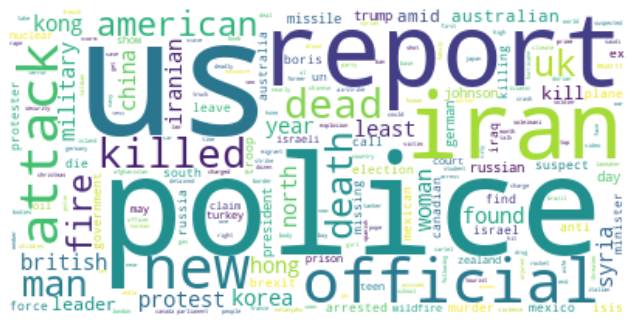

In [26]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

tx1 = world["Title"].str.cat(sep=',').lower()
stop_list = ["say", "says","said"]
wordcloud = WordCloud(background_color="white",
                      collocations=False, # avoid repetition
                      stopwords=stop+stop_list).generate(tx1)

# Set the size of the figure
plt.figure(num = 1, figsize=(10, 8),dpi=80, frameon=False, clear=True)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Factorize the Categorical Labels:

In [27]:
# The 1st way: 
# lv = LabelEncoder()
# data["Category"] = lv.fit_transform(data["Category"])

# The 2nd way:
codes, uniques = pd.factorize(data["Category"])
display(codes, uniques)
data["Category"] = codes

array([0, 0, 1, ..., 0, 3, 2])

Index(['us', 'entertainment', 'world', 'politics'], dtype='object')

# TF-IDF Vectorizer

In [28]:
'''
The following code is Error !!!! 
Because the return value of data["Content"] is still a dataFrame !!!
'''
# tf_vect = TfidfVectorizer()
# data["Content"] = tf_vect.fit_transform(data["Content"])
# X = data["Content"]
# y = data["Category"]
# # Splict training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

'\nThe following code is Error !!!! \nBecause the return value of data["Content"] is still a dataFrame !!!\n'

In [29]:
tf_vect = TfidfVectorizer()
X = tf_vect.fit_transform(data["Content"])
y = data["Category"]
# Splict training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Naive Bayes

In [30]:
start = time.time()

mnb_model = MultinomialNB()

clf_mnb = mnb_model.fit(X_train, y_train)
y_pred_mnb = mnb_model.fit(X_train, y_train).predict(X_test)

print('The Accuarcy of Training Set is: {0}\nThe Accuarcy of Testing Set is: {1}'\
      .format(clf_mnb.score(X_train, y_train), clf_mnb.score(X_test, y_test)))

end = time.time()
print("The time of this algorithm is : {}'s'".format(end-start))

The Accuarcy of Training Set is: 0.8926315789473684
The Accuarcy of Testing Set is: 0.8565415643633812
The time of this algorithm is : 0.12718725204467773's'


In [31]:
# Cross Validation
val_scores_mnb = cross_val_score(mnb_model, X, y, cv = 10)
print('Score of each Validation is: {0} \nMean of score is: {1}'\
      .format(val_scores_mnb, val_scores_mnb.mean()))

Score of each Validation is: [0.86645636 0.84315789 0.85263158 0.84526316 0.86842105 0.86842105
 0.85368421 0.86421053 0.86947368 0.86631579] 
Mean of score is: 0.8598035309092922


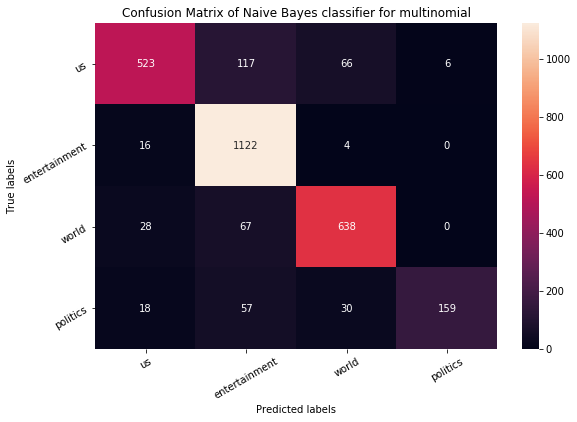

In [32]:
# Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
# print("The confustion matrix:\n", cm_mnb)
# Plot the comfusion matrix
fig, axes = plt.subplots(figsize=(9, 6))
sns.heatmap(cm_mnb, annot = True, ax = axes, fmt = 'g'); 
# labels, title and ticks
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix of Naive Bayes classifier for multinomial')
names = ['us', 'entertainment', 'world', 'politics']
axes.xaxis.set_ticklabels(names, rotation=30)
axes.yaxis.set_ticklabels(names, rotation=30)
plt.show()

# Logistic Regression

In [33]:
start = time.time()

lg_model = LogisticRegression()

clf_lg = lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.fit(X_train, y_train).predict(X_test)

print('The Accuarcy of Training Set is: {0}\nThe Accuarcy of Testing Set is: {1}'\
      .format(clf_lg.score(X_train, y_train), clf_lg.score(X_test, y_test)))

end = time.time()
print("The time of this algorithm is : {}'s".format(end-start))

The Accuarcy of Training Set is: 0.9747368421052631
The Accuarcy of Testing Set is: 0.9270431427569273
The time of this algorithm is : 10.884007692337036's


In [34]:
# Cross Validation
val_scores_lg = cross_val_score(lg_model, X, y, cv = 10)
print('Score of each Validation is: {0} \nMean of score is: {1}'\
      .format(val_scores_lg, val_scores_lg.mean()))

/home/weijun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/weijun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Score of each Validation is: [0.93270242 0.91578947 0.93368421 0.92421053 0.91894737 0.93684211
 0.92631579 0.92210526 0.92947368 0.93157895] 
Mean of score is: 0.9271649786927888


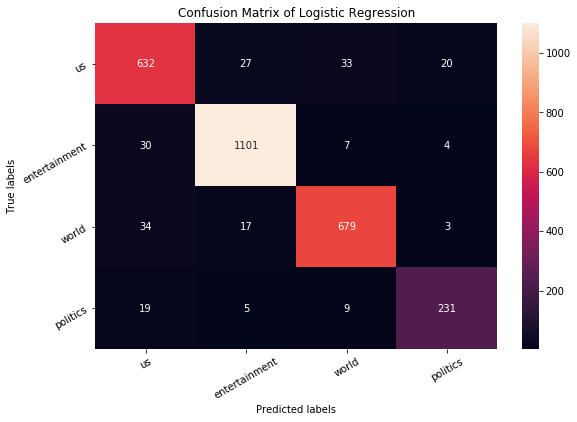

In [35]:
# Confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)
# Plot the comfusion matrix
fig, axes = plt.subplots(figsize=(9, 6))
sns.heatmap(cm_lg, annot = True, ax = axes, fmt = 'g')
# labels, title and ticks
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix of Logistic Regression')
names = ['us', 'entertainment', 'world', 'politics']
axes.xaxis.set_ticklabels(names, rotation=30)
axes.yaxis.set_ticklabels(names, rotation=30)
plt.show()

# XGBoost

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [37]:
start = time.time()
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
end = time.time()
print("The time of this algorithm is : {}'s'".format(end-start))

The time of this algorithm is : 269.17341661453247's'


In [38]:
# make predictions for test data
y_pred_xgb = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

In [39]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.63%


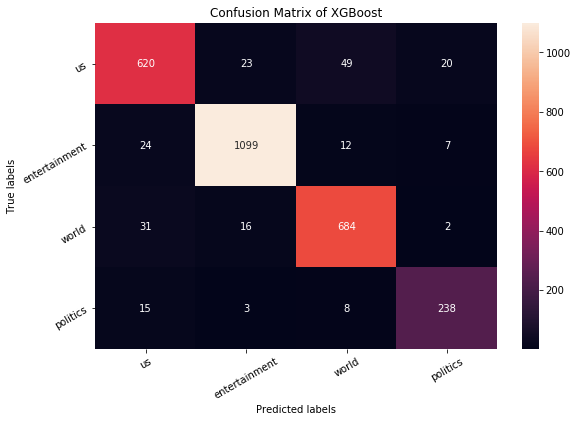

In [40]:
# Confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_xgb)
# Plot the comfusion matrix
fig, axes = plt.subplots(figsize=(9, 6))
sns.heatmap(cm_lg, annot = True, ax = axes, fmt = 'g')
# labels, title and ticks
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix of XGBoost')
names = ['us', 'entertainment', 'world', 'politics']
axes.xaxis.set_ticklabels(names, rotation=30)
axes.yaxis.set_ticklabels(names, rotation=30)
plt.show()

# Build Neural Network and Deep Learning
## epochs = 5

In [41]:
X_train.shape

(6650, 59445)

In [42]:
network = models.Sequential()

network.add(layers.Dense(512, activation="relu", 
                         input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4, activation="softmax"))

In [43]:
network.compile(optimizer="rmsprop", 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

In [44]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6650, 59445)

(2851, 59445)

(6650,)

(2851,)

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train = X_train.astype("float32")

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_test = X_test.astype("float")

In [46]:
y_train01 = to_categorical(y_train)
y_test01 = to_categorical(y_test)

display(X_train.shape, y_train01.shape, X_test.shape, y_test01.shape)

(6650, 59445)

(6650, 4)

(2851, 59445)

(2851, 4)

In [47]:
network.fit(X_train, y_train01, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(X_test, y_test01)
print("test accuarcy: {}".format(test_acc))

Epoch 1/5
6650/6650 [==============================] - 33s 5ms/step - loss: 0.5773 - accuracy: 0.8592
Epoch 2/5
6650/6650 [==============================] - 46s 7ms/step - loss: 0.1388 - accuracy: 0.9710
Epoch 3/5
6650/6650 [==============================] - 42s 6ms/step - loss: 0.0437 - accuracy: 0.9925
Epoch 4/5
6650/6650 [==============================] - 34s 5ms/step - loss: 0.0121 - accuracy: 0.9986
Epoch 5/5
2851/2851 [==============================] - 6s 2ms/step
test accuarcy: 0.9428271055221558


In [48]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               30436352  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 30,438,404
Trainable params: 30,438,404
Non-trainable params: 0
_________________________________________________________________


In [49]:
pred = network.predict(X_test)
pred

array([[2.0862537e-06, 9.9999380e-01, 2.8210175e-07, 3.8621911e-06],
       [9.9126786e-01, 1.3266001e-03, 6.3808169e-03, 1.0247994e-03],
       [9.0177841e-03, 4.7223546e-04, 1.8226070e-04, 9.9032778e-01],
       ...,
       [6.4410999e-02, 9.2612034e-01, 5.5007059e-03, 3.9679827e-03],
       [9.9234277e-01, 1.5809783e-04, 7.1969195e-03, 3.0220571e-04],
       [7.5581561e-06, 7.5326074e-07, 9.9997962e-01, 1.1994336e-05]],
      dtype=float32)

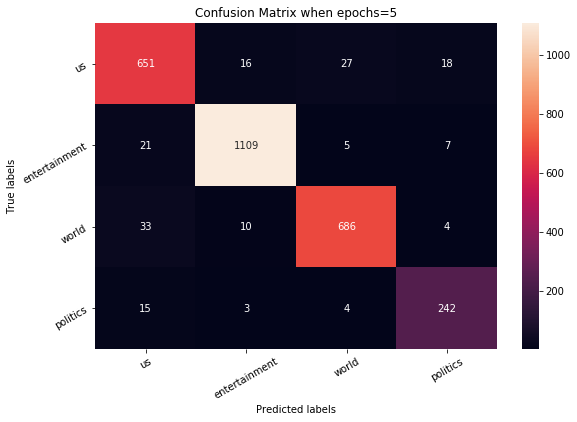

In [50]:
confusionMatrix = confusion_matrix(y_test, list(map(np.argmax, pred)))
names = ['us', 'entertainment', 'world', 'politics']
plt.figure(figsize = (9,6))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=5')
ax.xaxis.set_ticklabels(names, rotation=30)
ax.yaxis.set_ticklabels(names, rotation=30)
plt.show()

## epochs = 10

In [51]:
network.fit(X_train, y_train01, epochs=10, batch_size=128)

test_loss, test_acc = network.evaluate(X_test, y_test01)
print("test accuarcy: {}".format(test_acc))

Epoch 1/10
6650/6650 [==============================] - 31s 5ms/step - loss: 7.6668e-04 - accuracy: 0.9998
Epoch 2/10
6650/6650 [==============================] - 32s 5ms/step - loss: 1.7830e-04 - accuracy: 1.0000
Epoch 3/10
6650/6650 [==============================] - 33s 5ms/step - loss: 4.2510e-05 - accuracy: 1.0000
Epoch 4/10
6650/6650 [==============================] - 31s 5ms/step - loss: 1.2316e-05 - accuracy: 1.0000
Epoch 5/10
6650/6650 [==============================] - 31s 5ms/step - loss: 4.1933e-06 - accuracy: 1.0000
Epoch 6/10
6650/6650 [==============================] - 31s 5ms/step - loss: 1.8436e-06 - accuracy: 1.0000
Epoch 7/10
6650/6650 [==============================] - 31s 5ms/step - loss: 1.0420e-06 - accuracy: 1.0000
Epoch 8/10
6650/6650 [==============================] - 31s 5ms/step - loss: 6.8718e-07 - accuracy: 1.0000
Epoch 9/10
6650/6650 [==============================] - 31s 5ms/step - loss: 5.0297e-07 - accuracy: 1.0000
Epoch 10/10
2851/2851 [==============

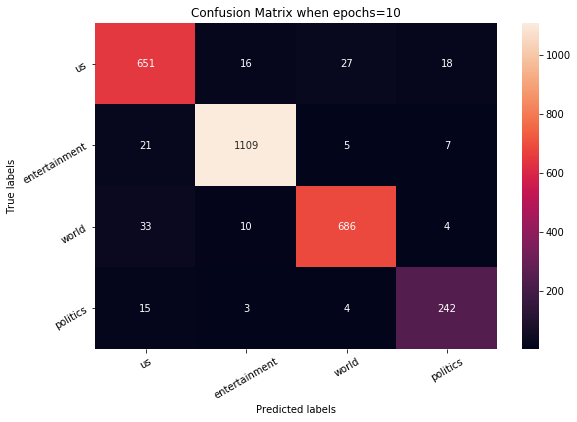

In [52]:
confusionMatrix = confusion_matrix(y_test, list(map(np.argmax, pred)))
names = ['us', 'entertainment', 'world', 'politics']
plt.figure(figsize = (9,6))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=10')
ax.xaxis.set_ticklabels(names, rotation=30)
ax.yaxis.set_ticklabels(names, rotation=30)
plt.show()

When I set to epochs=20, the result is only 0.1% better than epochs=5. So I choose to set epochs=5.

# Recurrent Neural Network(RNN) 

In [53]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

In [54]:
texts = news["Content"]
labels = news["Category"]
display(news.head(2))

,Title,Content,Date,Category
0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us
1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us


In [55]:
possible_labels = news["Category"].unique().tolist()
display(possible_labels)

['us', 'entertainment', 'world', 'politics']

In [56]:
one_hot = OneHotEncoder()
one_hot_df = pd.DataFrame(one_hot.fit_transform(news[["Category"]]).toarray())
news = news.join(one_hot_df)

In [57]:
display(news.head(10))

,Title,Content,Date,Category,0,1,2,3
0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us,0.0,0.0,1.0,0.0
1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us,0.0,0.0,1.0,0.0
2,Kevin Hart reflects on 2019: 'My appreciation ...,"Kevin Hart, is reflecting on what has been a w...",2019-12-10 00:00:00,entertainment,1.0,0.0,0.0,0.0
3,Jennifer Lopez shares sweet message to Shakira...,"Jennifer Lopez, is spreading the love.,Ahead o...",2020-02-02 00:00:00,entertainment,1.0,0.0,0.0,0.0
4,Maher rips Warren for playing 'woman card' aga...,"""Real Time"" host ,Bill Maher, on Friday night ...",2020-01-18 00:00:00,entertainment,1.0,0.0,0.0,0.0
5,Mugabe family at odds with Zimbabwe government...,"The family of ,Zimbabwe's, former strongman Ro...",2019-09-12 00:00:00,world,0.0,0.0,0.0,1.0
6,Doctor killed in plane crash while preparing f...,"A ,plane crash, ahead of a ,Florida, air show ...",2019-11-03 00:00:00,us,0.0,0.0,1.0,0.0
7,Five cities or villages outside United States ...,It seems the United States is not the only cou...,2020-02-05 00:00:00,world,0.0,0.0,0.0,1.0
8,Louisiana couple dead in Puerto Rico after cat...,"A ,Louisiana, couple died in Puerto Rico on We...",2020-01-02 00:00:00,us,0.0,0.0,1.0,0.0
9,Jeffrey Epstein prison guard's lawyer 'highly ...,A lawyer for one of the two guards on duty whe...,2020-01-30 00:00:00,us,0.0,0.0,1.0,0.0


In [58]:
news["us"] = news[2]
news["entertainment"] = news[0]
news["world"] = news[3]
news["politics"] = news[1]
news.drop(columns=[0,1,2,3], inplace=True)
display(news.head(5))

,Title,Content,Date,Category,us,entertainment,world,politics
0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us,1.0,0.0,0.0,0.0
1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us,1.0,0.0,0.0,0.0
2,Kevin Hart reflects on 2019: 'My appreciation ...,"Kevin Hart, is reflecting on what has been a w...",2019-12-10 00:00:00,entertainment,0.0,1.0,0.0,0.0
3,Jennifer Lopez shares sweet message to Shakira...,"Jennifer Lopez, is spreading the love.,Ahead o...",2020-02-02 00:00:00,entertainment,0.0,1.0,0.0,0.0
4,Maher rips Warren for playing 'woman card' aga...,"""Real Time"" host ,Bill Maher, on Friday night ...",2020-01-18 00:00:00,entertainment,0.0,1.0,0.0,0.0


In [59]:
targets = news[possible_labels].values

In [60]:
# Configuration
max_sequence_length = 200
max_vocab_size = 20000
embedding_dim = 50
validation_split = 0.3
batch_size = 128
epochs = 20

Parsing the GloVe word-embeddings file:

In [61]:
# prepare word embeddings
# glove
word2vec = {}
with open(os.path.join('/home/weijun/Desktop/glove.6B/glove.6B.%sd.txt'\
                       % embedding_dim)) as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype = 'float32')
        word2vec[word] = vec
print('number of word vectors: %s' % len(word2vec))


number of word vectors: 400000


Preparing the GloVe word-embedding matrix:

In [62]:
# convert texts(strings) into integers
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(texts)
# a list of lists where each sublist is word indexes
texts = tokenizer.texts_to_sequences(texts) 

In [63]:
# word to idx mapping
word2idx = tokenizer.word_index

In [64]:
# pad sequences to get a NxT matrix, N = # of comments, T = length of each comment
data = pad_sequences(texts, maxlen = max_sequence_length)
print("shape of data:", data.shape)

shape of data: (9501, 200)


In [65]:
# prepare embedding matrix
num_words = min(max_vocab_size, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word2idx.items():
    if i < max_vocab_size:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [66]:
# Create Embedding layer with pre-trained word embeddings
# Do not train embeddings with trainable = False 
embedding_layer = Embedding(
    input_dim = num_words,
    output_dim = embedding_dim,
    weights = [embedding_matrix],
    input_length = max_sequence_length,
    trainable = False
    )

In [67]:
# train LSTM network with a single LSTM layer
input_ = Input(shape = (max_sequence_length,))
x = embedding_layer(input_)
x = LSTM(64, return_sequences = True)(x)
x = GlobalMaxPool1D()(x)
output = Dense(len(possible_labels), activation = 'sigmoid')(x) # Use same feature matrix to calculate 2 separate sigmoid for 2 different labels

model = Model(input_, output)
# 2 different binary classification
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics = ['accuracy']
    )

r = model.fit(
    data,
    targets,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = validation_split
    )

Train on 6650 samples, validate on 2851 samples
Epoch 1/20
6650/6650 [==============================] - 21s 3ms/step - loss: 0.3167 - accuracy: 0.8664 - val_loss: 0.2142 - val_accuracy: 0.9185
Epoch 2/20
6650/6650 [==============================] - 18s 3ms/step - loss: 0.1788 - accuracy: 0.9326 - val_loss: 0.1774 - val_accuracy: 0.9360
Epoch 3/20
6650/6650 [==============================] - 21s 3ms/step - loss: 0.1517 - accuracy: 0.9453 - val_loss: 0.1604 - val_accuracy: 0.9408
Epoch 4/20
6650/6650 [==============================] - 19s 3ms/step - loss: 0.1298 - accuracy: 0.9521 - val_loss: 0.1438 - val_accuracy: 0.9476
Epoch 5/20
6650/6650 [==============================] - 20s 3ms/step - loss: 0.1184 - accuracy: 0.9577 - val_loss: 0.1436 - val_accuracy: 0.9488
Epoch 6/20
6650/6650 [==============================] - 20s 3ms/step - loss: 0.1008 - accuracy: 0.9650 - val_loss: 0.1579 - val_accuracy: 0.9460
Epoch 7/20
6650/6650 [==============================] - 18s 3ms/step - loss: 0.096

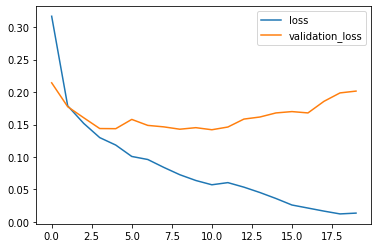

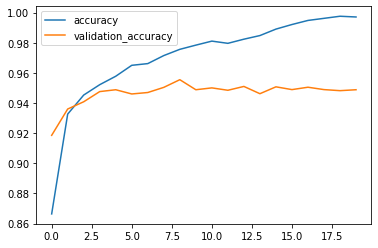

In [68]:
# plot the loss for training data and validation set
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [69]:
# calcuate average auc across all 6 labels
pred = model.predict(data)
aucs = []
for j in range(len(possible_labels)):
    auc = roc_auc_score(targets[:,j], pred[:,j])
    aucs.append(auc)
print("average aucuracy across all labels: ",np.mean(aucs))

average auc across all labels:  0.9934065692667791


In [70]:
# confusionMatrix = confusion_matrix(y_test, list(map(np.argmax, pred)))
# names = ['us', 'entertainment', 'world', 'politics']
# plt.figure(figsize = (9,6))
# ax= plt.subplot()
# sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix of RNN with epochs=20')
# ax.xaxis.set_ticklabels(names, rotation=30)
# ax.yaxis.set_ticklabels(names, rotation=30)
# plt.show()

# LDA Method

In [71]:
docs = news["Title"]
stop = stopwords.words('english')
docs = docs.str.lower().str.split()
docs = docs.apply(lambda x: ' '.join([word for word in x if word not in stop]))
docs.head()

0    alabama deputies help veteran disability tryin...
1    father missing family confesses killing wife, ...
2    kevin hart reflects 2019: 'my appreciation lif...
3    jennifer lopez shares sweet message shakira ah...
4    maher rips warren playing 'woman card' sanders...
Name: Title, dtype: object

In [72]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [73]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [74]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [75]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 100 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=50, no_above=0.1)

In [76]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [77]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 315
Number of documents: 9501


In [78]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [79]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -10.4082.
[([(0.09963644, 'police'),
   (0.08111222, 'man'),
   (0.06203951, 'woman'),
   (0.0374984, 'california'),
   (0.035244055, 'arrested'),
   (0.032038447, 'police_say'),
   (0.031380944, 'florida'),
   (0.029517151, 'suspect'),
   (0.029229486, 'murder'),
   (0.027627815, 'life'),
   (0.026572838, 'shooting'),
   (0.026176143, 'charged'),
   (0.025145514, 'accused'),
   (0.024233323, 'prison'),
   (0.02408581, 'car'),
   (0.023884188, 'texas'),
   (0.02278925, 'get'),
   (0.021884257, 'officer'),
   (0.020609176, 'school'),
   (0.019708507, 'dy')],
  -4.216071718934825),
 ([(0.052757934, 'found'),
   (0.03732876, 'child'),
   (0.036357988, 'christmas'),
   (0.036078483, 'home'),
   (0.035532266, 'missing'),
   (0.03155079, 'son'),
   (0.030913772, 'it'),
   (0.028556297, 'photo'),
   (0.027647624, 'dead'),
   (0.027535107, 'body'),
   (0.027423969, 'family'),
   (0.027140757, 'husband'),
   (0.026881723, 'shot'),
   (0.023893194, 'daughter'),
   (0.021

In [80]:
top_topics[0]

([(0.09963644, 'police'),
  (0.08111222, 'man'),
  (0.06203951, 'woman'),
  (0.0374984, 'california'),
  (0.035244055, 'arrested'),
  (0.032038447, 'police_say'),
  (0.031380944, 'florida'),
  (0.029517151, 'suspect'),
  (0.029229486, 'murder'),
  (0.027627815, 'life'),
  (0.026572838, 'shooting'),
  (0.026176143, 'charged'),
  (0.025145514, 'accused'),
  (0.024233323, 'prison'),
  (0.02408581, 'car'),
  (0.023884188, 'texas'),
  (0.02278925, 'get'),
  (0.021884257, 'officer'),
  (0.020609176, 'school'),
  (0.019708507, 'dy')],
 -4.216071718934825)

In [81]:
top_topics[1]

([(0.052757934, 'found'),
  (0.03732876, 'child'),
  (0.036357988, 'christmas'),
  (0.036078483, 'home'),
  (0.035532266, 'missing'),
  (0.03155079, 'son'),
  (0.030913772, 'it'),
  (0.028556297, 'photo'),
  (0.027647624, 'dead'),
  (0.027535107, 'body'),
  (0.027423969, 'family'),
  (0.027140757, 'husband'),
  (0.026881723, 'shot'),
  (0.023893194, 'daughter'),
  (0.021711767, 'mom'),
  (0.02103417, 'share'),
  (0.017723542, 'we'),
  (0.017251596, 'go'),
  (0.01702304, 'open'),
  (0.016851658, 'month')],
 -7.436866159294459)

In [82]:
top_topics[2]

([(0.19530554, 'trump'),
  (0.07846431, 'impeachment'),
  (0.06868781, 'show'),
  (0.052257232, 'trial'),
  (0.043293677, 'the'),
  (0.04125019, 'video'),
  (0.029072324, 'senate'),
  (0.027761927, 'back'),
  (0.026493257, 'sander'),
  (0.02539674, 'biden'),
  (0.024336377, 'dems'),
  (0.020730792, 'would'),
  (0.020504953, 'set'),
  (0.019773435, 'he'),
  (0.019319601, 'trump_impeachment'),
  (0.019194031, 'warren'),
  (0.018522825, 'democrat'),
  (0.01825653, 'witness'),
  (0.017473198, 'could'),
  (0.017178819, 'campaign')],
 -9.086466402718193)

# Find Similarity and Build Recommendation System

In [83]:
display(X.shape)
# X is a matirx stored vectors after tf-ifd vectorize
display(news)

(9501, 59445)

,Title,Content,Date,Category,us,entertainment,world,politics
0,Alabama deputies help veteran with disability ...,"Deputies, in ,Alabama, pitched in last week to...",2019-11-10 00:00:00,us,1.0,0.0,0.0,0.0
1,Father of missing family confesses to killing ...,"The father of a missing ,Connecticut, family h...",2020-01-15 00:00:00,us,1.0,0.0,0.0,0.0
2,Kevin Hart reflects on 2019: 'My appreciation ...,"Kevin Hart, is reflecting on what has been a w...",2019-12-10 00:00:00,entertainment,0.0,1.0,0.0,0.0
3,Jennifer Lopez shares sweet message to Shakira...,"Jennifer Lopez, is spreading the love.,Ahead o...",2020-02-02 00:00:00,entertainment,0.0,1.0,0.0,0.0
4,Maher rips Warren for playing 'woman card' aga...,"""Real Time"" host ,Bill Maher, on Friday night ...",2020-01-18 00:00:00,entertainment,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9496,What was the worst hurricane to hit the US? He...,"Between early June and late November, coastal ...",2019-06-30 00:00:00,us,1.0,0.0,0.0,0.0
9497,"Brad Pitt jabs Meghan Markle, Prince Harry and...","Brad Pitt, poked fun at both “,Brexit,” and “M...",2020-02-03 00:00:00,entertainment,0.0,1.0,0.0,0.0
9498,"Oklahoma man allegedly stole truck, drove 130 ...","Oklahoma, police arrested a man on Wednesday a...",2020-01-02 00:00:00,us,1.0,0.0,0.0,0.0
9499,Mixed results as Sanders tries to get past cla...,It’s been nearly a week since the primetime du...,2020-01-20 00:00:00,politics,0.0,0.0,0.0,1.0


Delete the brackets("[]") and reshape by np.delete

Difference between numpy.array shape (R, 1) and (R,): 

https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

The 2nd way: np.flatten()

In [84]:
display(X[0].toarray(), X[0].toarray().shape, 
        np.delete(X[0].toarray(),1), np.delete(X[0].toarray(),1).shape)

array([[0., 0., 0., ..., 0., 0., 0.]])

(1, 59445)

array([0., 0., 0., ..., 0., 0., 0.])

(59444,)

## Build Cosine Similarity Function Model

In [85]:
# compute the similarity between the articles
def cosine_similarity(x,y):
    if isinstance(x, (np.ndarray, np.generic)) == False:
        x = x.toarray()
    if isinstance(y, (np.ndarray, np.generic)) == False:
        y = y.toarray()
    try:
        if x.shape[1] != None:
            x = np.delete(x, 1)
        if y.shape[1] != None:
            y = np.delete(y, 1)
    except BaseException as e:
        print(e)
        pass
    x1 = linalg.norm(x)
    y1 = linalg.norm(y)
    cos = np.dot(x,y)/(x1*y1)
    return cos

x = np.array([3,2,0,5,0,0,0,2,0,0])
y = np.array([1,0,0,0,0,0,0,1,0,2])
display(cosine_similarity(x,y), cosine_similarity(X[0], X[1]))

tuple index out of range


0.314970394174356

0.11033600731003503

## Check how performance of  this model

In [86]:
similarity_list=[]
for i in X:
    similarity_list.append(cosine_similarity(X[9499], i))
similarity_list = np.array(similarity_list)

# Find the most simlarity to the new of index of 9499:
display(similarity_list.argsort()[-2], similarity_list[similarity_list.argsort()[-2]])
print("The index of most similarity of this news is: {}, \nThe index of similarity is: {} "\
     .format(similarity_list.argsort()[-2], similarity_list[similarity_list.argsort()[-2]]))

184

0.6936888524799418

The index of most similarity of this news is: 184, 
The index of similarity is: 0.6936888524799418 


In [87]:
# take a look the content between these two news, check the similarity
display(news.iloc[9499]["Content"], news.iloc[184]["Content"])

'It’s been nearly a week since the primetime dust-up between progressive standard-bearers and ,2020 Democratic presidential nomination, rival,s Sens. Bernie Sanders of Vermont, and ,Elizabeth Warren of Massachusetts ,over sexism in politics and whether or not he told her a woman couldn’t win the presidency.,The two candidates shook hands and briefly conversed at a Martin Luther King Jr. prayer service in Columbia, S.C.,\xa0on Monday morning. Later, the two marched arm-in-arm along with many of their top rivals for the nomination,Both White House contenders have been trying to move on from the showdown, and Sanders, in particular, has turned up the volume in recent days on his pitch for women voters in the state that holds the first primary in the race for the White House.,But those efforts haven’t been met with total success.,The independent populist lawmaker who’s making his second straight bid for the White House made headlines once again on Sunday for saying \'yes\' when asked if ge

'EXETER, N.H. – A simmering feud between 2020 rivals ,Sen. Bernie Sanders of Vermont ,and ,former Vice President Joe Biden, over Sanders\' accusations that Biden had long-advocated cutting\xa0,Social Security, broke out into a verbal fistfight on Saturday, as Biden called a Sanders\' campaign video “a lie” and “a doctored tape” while the Sanders campaign accusing Biden of “trying to doctor his own public record.”,Sanders has repeatedly argued\xa0,this election cycle, that Biden,\xa0during his years as a senator from Delaware and later as vice president for two terms under President Barack Obama,\xa0had pushed to weaken Social Security. Biden has repeatedly denied the claims.,A video tweeted out by the Sanders campaign hours before Tuesday’s primetime Democratic presidential primary debate in Iowa included a clip of Sanders from a recent CNN interview saying: “Joe Biden has been on the floor of the Senate talking about the need to cut Social Security.” It then showed an old C-SPAN clip 

## Build Recommendation System Model 

In [88]:
display(news.iloc[9499].index, news.iloc[9499].name)

Index(['Title', 'Content', 'Date', 'Category', 'us', 'entertainment', 'world',
       'politics'],
      dtype='object')

9499

In [89]:
class Recommendation_System:
    def __init__(self):
        pass
    
    def cosine_similarity(self,x,y):
        """
        Compute the Cosine Similaruty of two artiles x and y
        """
        if isinstance(x, (np.ndarray, np.generic)) == False:
            x = x.toarray()
        if isinstance(y, (np.ndarray, np.generic)) == False:
            y = y.toarray()
        try:
            if x.shape[1] != None:
                x = np.delete(x, 1)
            if y.shape[1] != None:
                y = np.delete(y, 1)
        except BaseException as e:
            pass
        x1 = linalg.norm(x)
        y1 = linalg.norm(y)
        cos = np.dot(x,y)/(x1*y1)
        return cos
    
    def recommendation(self,x):
        """
        Compute the similarity between the specific article and others atricles, 
        and return the five most relevant news
        """
        x = X[x.name] 
        similarity_list = []
        for i in X:
            similarity_list.append(cosine_similarity(x, i))
        similarity_list = np.array(similarity_list)
        # get the index of the most five similar news
        rdy_index = similarity_list.argsort()[-6:-1]
        return rdy_index
    
    def show_content(self,x):
        """
        show the result of recommedation system
        """
        for i in x:
            print("The index of the news is %d " % (i))
            print(news.iloc[i]["Title"])
            print(news.iloc[i]["Content"])
            print("*"*99)

In [90]:
rdy = Recommendation_System()
index = rdy.recommendation(news.iloc[9099])
index

array([5961, 7904, 6311, 9320, 8972])

In [91]:
# Show the contents of the airtles which are recommendated by the model
rdy.show_content(index)

The index of the news is 5961 
Body 'encased' in concrete found in basement of Colorado home, man arrested, sheriff says
Authorities in ,Colorado, investigating a possible ,killing, at an apartment in a ,Denver, neighborhood made a grisly discovery on Friday when they located the body of an adult male ,encased in concrete, in the basement, according to officials.,The ,Adams County Sheriff's Office, said in a news release that detectives had obtained a search warrant for an apartment on York Street in unincorporated Adams County after receiving information from the Arvada Police Department regarding a possible ,shooting, that took place at the location on Nov. 8.,A SWAT team served the search warrant at the apartment on Thursday afternoon and arrested 38-year-old Russell Montoya Jr. inside.,"A search of the residence and multiple interviews have confirmed that a shooting and homicide occurred inside the apartment," the ,sheriff's office said,.,As members of the Adams County Sheriff’s Of